In [12]:
from uts_ad import residual_outlier_detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as randn
import seaborn as sns
from matplotlib.dates import DateFormatter
%matplotlib inline



In [13]:
df = pd.read_csv('BTC-USD.csv', sep= ',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792
2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063,41441.164063,19652846215


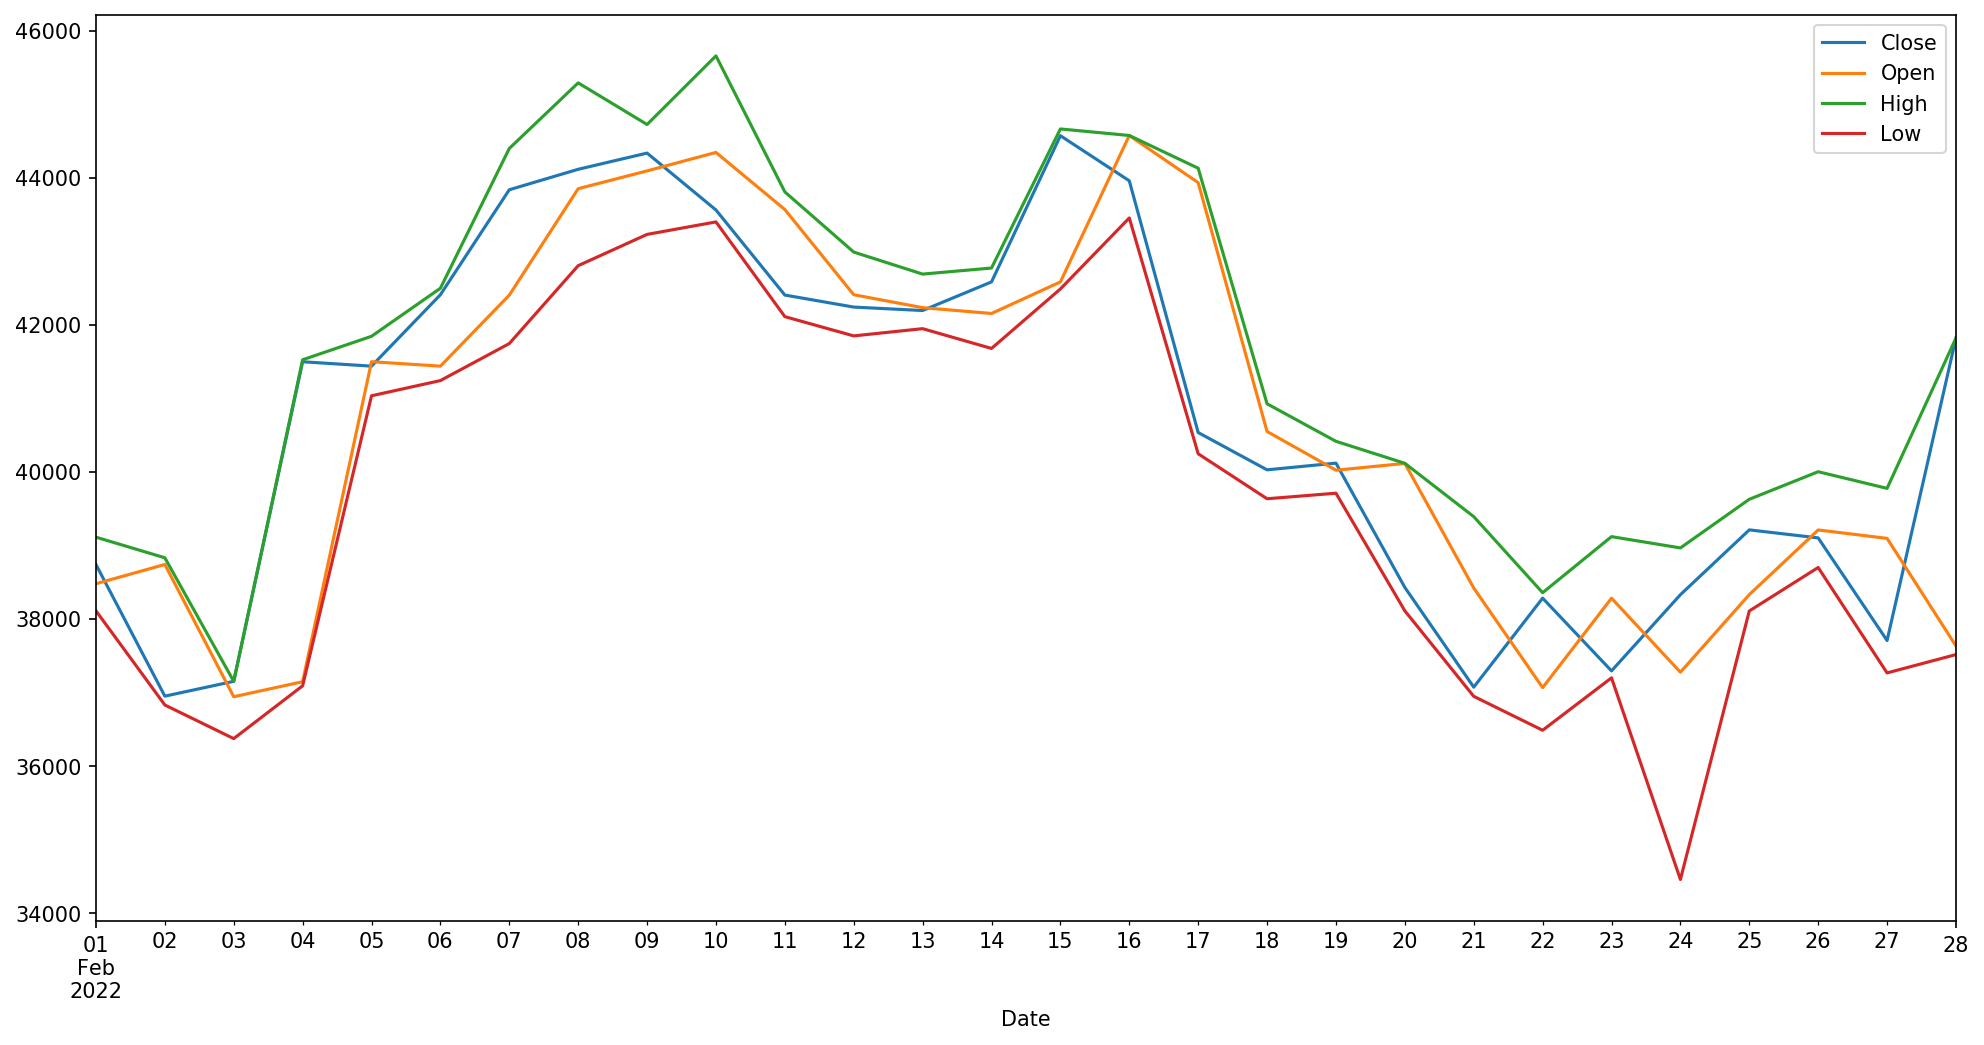

In [14]:
plt.figure(figsize=(16, 8), dpi=150)
df['Close'].plot()
df['Open'].plot()
df['High'].plot()
df['Low'].plot()
plt.legend()